In [1]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

/home/crystal/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)

In [3]:
X.shape

(500, 2)

In [4]:
y.shape

(500,)

In [5]:
from collections import Counter
Counter(y)

Counter({0: 250, 1: 250})

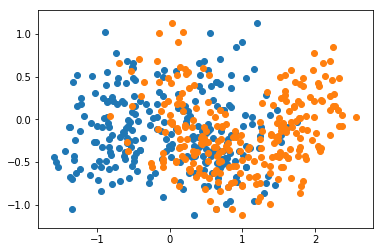

In [6]:
plt.scatter(X[y==0, 0], X[y==1, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

AdaBoostClassifier, 由于其是用所有的数据集去训练, 只是每次对上次没有拟合好的数据的权重加大，   
不存在像RandomForest 中的oob_score 参数, 故需要将数据分为训练数据集和测试数据集。

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
AdaBoostClf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500)
AdaBoostClf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

In [11]:
AdaBoostClf.score(X_test, y_test)

0.864

可以调节参数，提高模型的准确率

GradientBoostingClassifier,注意：其本身就是以DecisionTreeClassifier为基础训练的

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
GraBoostClf = GradientBoostingClassifier(max_depth=2, n_estimators=500)
GraBoostClf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [13]:
GraBoostClf.score(X_test, y_test)

0.896

Boosting 同样也可以解决回归问题

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor